# Coursera Capstone Project Week 3: Neighborhoods in Toronto

*Name: Lydia* 

Hello, welcome to this notebook! This notebook contains the IBM Data Science Capstone Project Week 3 assignment, clustering neighborhoods in Toronto. I start the notebook with retrieving Toronto postal code and Toronto neigborhood data from Wikipedia. Then, I add geospatial data, the latitude and longitude, to the data frame in order to create a map with Folium. Finally, I show a clustering analysis of neighborhoods in Toronto. Enjoy reading this analysis!

First, I start with installing and importing the required packages and libraries.

In [1]:
#import packages and libraries
#import packages
import pandas as pd
import csv

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import requests # library to handle requests
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!pip install geocoder
import geocoder # import geocoder

! pip install folium==0.5.0
import folium # plotting library

from bs4 import BeautifulSoup #for webscraping

! pip install html-table-extractor

from html_table_extractor.extractor import Extractor

# Transform a json file into a pandas data frame
from pandas import json_normalize

# Import k-means for clustering
from sklearn.cluster import KMeans

# Matplotlib associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


print("Packages installed and libraries imported.")

Packages installed and libraries imported.


## Part 1: Webscraping with Beautiful Soup from Wikipedia

In this section, I retrieve Toronto postal code and Toronto neighborhood data from Wikipedia. There are multiple ways to do webscraping and convert the data into a table or data frame. You can do webscraping with Pandas, but I choose for the more challenging way: webscraping with the Beautiful Soup package! First, I refer to the webpage from which to scrape the data. Then, I create a *'soup'* to read the html text. After creating a *'soup'*, I'll be looking for the table that I'll be using in the next part of this analysis. 

In [2]:
#import data
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(url)


In [3]:
#Use Beatiful Soup package to find the table that is listed on the web page
soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
dfs = pd.read_html(page.text)

In [5]:
#find the table
table = soup.find_all('table')
table

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B

In [6]:
table_body=soup.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    print(cols)

[]
['M1A', 'Not assigned', 'Not assigned']
['M2A', 'Not assigned', 'Not assigned']
['M3A', 'North York', 'Parkwoods']
['M4A', 'North York', 'Victoria Village']
['M5A', 'Downtown Toronto', 'Regent Park, Harbourfront']
['M6A', 'North York', 'Lawrence Manor, Lawrence Heights']
['M7A', 'Downtown Toronto', "Queen's Park, Ontario Provincial Government"]
['M8A', 'Not assigned', 'Not assigned']
['M9A', 'Etobicoke', 'Islington Avenue, Humber Valley Village']
['M1B', 'Scarborough', 'Malvern, Rouge']
['M2B', 'Not assigned', 'Not assigned']
['M3B', 'North York', 'Don Mills']
['M4B', 'East York', 'Parkview Hill, Woodbine Gardens']
['M5B', 'Downtown Toronto', 'Garden District, Ryerson']
['M6B', 'North York', 'Glencairn']
['M7B', 'Not assigned', 'Not assigned']
['M8B', 'Not assigned', 'Not assigned']
['M9B', 'Etobicoke', 'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale']
['M1C', 'Scarborough', 'Rouge Hill, Port Union, Highland Creek']
['M2C', 'Not assigned', 'Not assigned']
['M

In [7]:
data_frame = pd.read_html(str(table))[0]

In [8]:
data_frame

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [9]:
type(data_frame)

pandas.core.frame.DataFrame

In [10]:
df = data_frame  #In the next section, I work with the abbreviated form of data frame when I refer to the table.
type(df)

pandas.core.frame.DataFrame

In [11]:
df.describe()

,Postal Code,Borough,Neighbourhood
count,180,180,180
unique,180,11,100
top,M9P,Not assigned,Not assigned
freq,1,77,77


In [12]:
df.dtypes

Postal Code      object
Borough          object
Neighbourhood    object
dtype: object

### Cleaning the Data Frame

Above, I have retrieved the data from Wikipedia. The table contains the postal codes in Toronto, the borough, and the neighborhoods in Toronto. As you can see in the table above, the table contains the value *'Not assigned'*. Each neighborhood should have a borough; therefore, I exclude the rows without a borough (value is 'not assigned') from the table. Postal codes could have multiple neighborhoods. 

In [13]:
# Exclude rows without a borough
df = df[df['Borough'] != 'Not assigned']

In [14]:
df.head(10)

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


Also, check if the column 'Neighbourhood' has a not assigned value. 

In [15]:
# Neighborhood variable: does it contain not assigned values?
unassigned_neighborhood = df.Neighbourhood == 'Not assigned'
unassigned_neighborhood.value_counts()

False    103
Name: Neighbourhood, dtype: int64

If the condition in the code above does not equal 'not assigned', the boolean value is 'false', otherwise it is true. All rows have a neighborhood, because all boolean values are 'false'.

Each postal code should be unique for the clustering analysis. A postal code can have more neighborhoods. You can see this in the printed head in the table above.

In [16]:
# Unique Postal Codes Check
postalcode = df['Postal Code'].unique()
len(postalcode)

103

In [17]:
#reset the index
df = df.reset_index()
df.drop(df[['index']],axis=1,inplace=True) #because the old index will become a column that contains redundant information
df.head(5)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


The table has all unique postal codes, the borough column does not contain unassigned values, the neighborhood column does not contain unassigned values, and multiple neighborhoods have been included for each postal code. So far, the data frame is ready for analysis! Let's print the shape of the data and check if the table is a data frame.

In [18]:
#table is data frame?
type(df)

pandas.core.frame.DataFrame

In [19]:
#shape of the data frame
df.shape

(103, 3)

The data frame has 103 rows and 3 columns. Each row represents a postal code. So, we can say that Toronto has 103 unique postal codes. The columns include postal code, borough, and neighborhood.

## Part 2: Appending Geo Data

In this section, I choose the less challenging way which is less time consuming. I downloaded the csv file on geospatial data including the latitudes and longitudes of the neighborhoods. 

In [20]:
path = 'http://cocl.us/Geospatial_data'
geo_data = pd.read_csv(path)

In [21]:
#explore geo data
geo_data.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In order to create a map of Toronto with Folium, you need to include the latitude and longitude data. Therefore, I add the latitude and longitude data from the geo data to the data frame I presented in part 1 of this notebook. I do this with the merge statement. I would like to keep all data from the data frame I created in part 1. So, I use the left-merge method.

In [22]:
#merge datasets
left_merge = pd.merge(df,geo_data,on='Postal Code',how='left')

In [23]:
left_merge.head(5)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Now, the latitude and longitude data has been added to the table I created in the previous section. Now, let's assign it to data frame Toronto. Also, I display the new shape of the data frame.

In [24]:
df_Toronto = left_merge

In [25]:
df_Toronto.head(5)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Let's check if there are any values missing for latitude and longitude. Otherwise, you cannot create a map with Folium.

In [26]:
#missing value count
print("Missing values Latitude:")
print(df_Toronto.Latitude.isnull().sum())
print("")
print("Missing values Longitude:")
print(df_Toronto.Longitude.isnull().sum())

Missing values Latitude:
0

Missing values Longitude:
0


Good, there are no missing values for latitude and longitude!

In [27]:
#The new shape of the dataframe
df_Toronto.shape

(103, 5)

In [28]:
#data frame type
type(df_Toronto)

pandas.core.frame.DataFrame

The new data frame has 2 extra columns: latitude and longitude. This brings it to 5 columns. There were no missing values for latitude and longitude. So, the data frame is ready to start the analysis!

## Part 3: Exploring and Clustering Neighborhoods in Toronto

This section is devoted to exploring and clustering neighborhoods in Toronto. Let's first create a map with Folium and visualize the neighborhoods. After catching a first glimpse of the data, I collect data on various venues from Foursquare. And finally, I perform a clustering analysis on venues within the neighborhoods of the Old City of Toronto (or boroughs including Toronto).

### Create a Map of Toronto with Folium

In [29]:
#Latitude and Longitude of Toronto
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [30]:
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

map_Toronto

Here, we have a nice overview over the city!

In [31]:
# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

As the map shows, there is a large number of dots (overlapping dots) around the city center of Toronto, also *Old Toronto*. Let's focus on the *Old city of Toronto*.

In [32]:
#Latitude and Longitude of the Old City of Toronto
address = 'Old Toronto, ON'

geolocator = Nominatim(user_agent="Old_Toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [33]:
map_Old_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

map_Old_Toronto

In [34]:
# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Old_Toronto)  
    
map_Old_Toronto

The map above shows the dispersion of neighborhoods in the Old city of Toronto.

### Boroughs including Toronto

Now, let's look at the dispersion of boroughs including *'Toronto'*. I filter all strings containing *'Toronto'* in the 'Borough' column. 

In [35]:
df_Toronto

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [36]:
df_Borough_Toronto = df_Toronto[df_Toronto['Borough'].str.contains('Toronto')]
df_Borough_Toronto = df_Borough_Toronto.rename(columns={'Neighbourhood':'Neighborhood'})

In [37]:
df_Borough_Toronto.tail(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
83,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
84,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049
86,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
87,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
92,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846
96,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [38]:
map_Borough_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Borough_Toronto['Latitude'], df_Borough_Toronto['Longitude'], df_Borough_Toronto['Borough'], df_Borough_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Borough_Toronto)  
    
map_Borough_Toronto

As you can see, the boroughs including Toronto are centered around the Old City of Toronto. 

**API Foursquare Section**

In this section, I retrieve venue data from Foursquare. I convert the venue data into a data frame. The venue data contains all types of nice spots within 500m of the neighborhood; this could be a coffee shop, a restaurant, a shopping mall, etc. <br> I clean the data, I analyze each neighborhood, and I display the top 3 most common venues per neighborhood. Finally, I group the data into clusters. Each cluster has a unique top 3 of most common venues (locations that people use on daily basis in a certain area). A neighborhood with a different set of common venues is assigned to a different cluster. At the end, I determine the optimal number of clusters for the clustering analysis by making a scree plot.

In [39]:
# The code was removed by Watson Studio for sharing.

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
Toronto_Venues = getNearbyVenues(names=df_Borough_Toronto['Neighborhood'],latitudes=df_Borough_Toronto['Latitude'],longitudes=df_Borough_Toronto['Longitude'])


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [42]:
#print the head of the Toronto venues table
Toronto_Venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


The dataset *'Toronto Venues'* displays all nice spots, including the neighborhood and venue category, you can find in the Old City of Toronto. I assume that the boroughs in the Old city of Toronto were named after Toronto in the early days (in the map, the boroughs with Toronto in it were centered around the city center). So, the Old City of Toronto contains all boroughs that include *'Toronto'*. City centers are most popular among tourists. Also, most activities take place in city centers and many venues are located in the city center. Therefore, I choose to focus on boroughs that include the name *'Toronto'* only. I drop the entries containing *'airport'* from the table, because I would like to focus on venues that people use on daily basis.  

In [43]:
#drop airport category
Toronto_Venues = Toronto_Venues[Toronto_Venues['Venue Category'] != 'Airport']
Toronto_Venues = Toronto_Venues[Toronto_Venues['Venue Category'] != 'Airport Food Court']
Toronto_Venues = Toronto_Venues[Toronto_Venues['Venue Category'] != 'Airport Gate']
Toronto_Venues = Toronto_Venues[Toronto_Venues['Venue Category'] != 'Airport Lounge']
Toronto_Venues = Toronto_Venues[Toronto_Venues['Venue Category'] != 'Airport Service']
Toronto_Venues = Toronto_Venues[Toronto_Venues['Venue Category'] != 'Airport Terminal']

The output below includes venues that you can find in the Old city Of Toronto.

In [44]:
#What are the unique venue categories we have retrieved from Foursquare?
Toronto_Venues['Venue Category'].unique()

array(['Coffee Shop', 'Bakery', 'Distribution Center', 'Spa',
       'Restaurant', 'Pub', 'Breakfast Spot', 'Gym / Fitness Center',
       'Park', 'Historic Site', 'Farmers Market', 'Chocolate Shop',
       'Performing Arts Venue', 'French Restaurant', 'Dessert Shop',
       'Yoga Studio', 'Café', 'Theater', 'Event Space', 'Shoe Store',
       'Brewery', 'Art Gallery', 'Cosmetics Shop', 'Asian Restaurant',
       'Electronics Store', 'Bank', 'Beer Store', 'Hotel',
       'Health Food Store', 'Wine Shop', 'Antique Shop',
       'Italian Restaurant', 'Creperie', 'Beer Bar', 'Sushi Restaurant',
       'Burger Joint', 'Mexican Restaurant', 'Diner', 'Burrito Place',
       'Fried Chicken Joint', 'Japanese Restaurant', 'Smoothie Shop',
       'Sandwich Place', 'Gym', 'Bar', 'College Auditorium',
       'College Cafeteria', 'Music Venue', 'Clothing Store',
       'Pizza Place', 'Plaza', 'Comic Shop', 'Ramen Restaurant',
       'Steakhouse', 'Movie Theater', 'Tanning Salon',
       'Fast Food 

In [45]:
len(Toronto_Venues['Venue Category'].unique())

233

There are 233 unique venue categories in Toronto. This is excluding the airport facilities.

In [46]:
Toronto_Venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1598,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Russell Division,43.664908,-79.322560,Light Rail Station
1599,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Jonathan Ashbridge Park,43.664702,-79.319898,Park
1600,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Ten Spot,43.664815,-79.324213,Spa
1601,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,ONE Academy,43.662253,-79.326911,Gym / Fitness Center
1602,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Revolution Recording,43.662561,-79.326940,Recording Studio


Now, let's make a data frame with dummy values. If the value is 1, it indicates that the neighborhood has a certain venue. For example, the Harbour front Neighborhood has a park; the venue category park equals 1 for the row with index Regent Park, Harbour front as neighborhood and Venue Category Park.

In [47]:
# one hot encoding
Toronto_category_dummies = pd.get_dummies(Toronto_Venues[['Venue Category']])

# add neighborhood column back to dataframe
Toronto_category_dummies['Neighborhood'] = Toronto_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_category_dummies.columns[-1]] + list(Toronto_category_dummies.columns[:-1])
Toronto_category_dummies = Toronto_category_dummies[fixed_columns]

Toronto_category_dummies.head()

,Neighborhood,Venue Category_Adult Boutique,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,...,Venue Category_Tibetan Restaurant,Venue Category_Toy / Game Store,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Toronto_categories_grouped = Toronto_category_dummies.groupby('Neighborhood').mean().reset_index()
Toronto_categories_grouped.tail(5)

,Neighborhood,Venue Category_Adult Boutique,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,...,Venue Category_Tibetan Restaurant,Venue Category_Toy / Game Store,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio
34,"The Annex, North Midtown, Yorkville",0.0,0.00000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.00000,0.0,0.00000,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000
35,The Beaches,0.0,0.00000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.00000,0.0,0.25000,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000
36,"The Danforth West, Riverdale",0.0,0.02381,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.02381,0.0,0.02381,0.00,0.00,0.000000,0.0,0.00,0.0,0.023810
37,"Toronto Dominion Centre, Design Exchange",0.0,0.03000,0.0,0.0,0.01,0.0,0.0,0.02,0.0,...,0.00000,0.0,0.00000,0.01,0.01,0.000000,0.0,0.01,0.0,0.000000
38,"University of Toronto, Harbord",0.0,0.00000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.00000,0.0,0.00000,0.00,0.00,0.030303,0.0,0.00,0.0,0.030303


In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now, let's make a top 3 of the most common venues for each neighborhood with the same postal code.

In [50]:
# Create a table with the top 3 venues per neighborhood
top_venues = 3
columns = ['Neighborhood']
indicators = ['st', 'nd', 'rd']

for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_categories_grouped['Neighborhood']

for ind in np.arange(Toronto_categories_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_categories_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Berczy Park,Venue Category_Coffee Shop,Venue Category_Cocktail Bar,Venue Category_Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Bakery
2,"Business reply mail Processing Centre, South C...",Venue Category_Pizza Place,Venue Category_Spa,Venue Category_Garden Center
3,"CN Tower, King and Spadina, Railway Lands, Har...",Venue Category_Plane,Venue Category_Coffee Shop,Venue Category_Boutique
4,Central Bay Street,Venue Category_Coffee Shop,Venue Category_Italian Restaurant,Venue Category_Sandwich Place


In [51]:
#additional data cleaning
neighborhoods_venues_sorted['1st Most Common Venue'] = neighborhoods_venues_sorted['1st Most Common Venue'].str[15:]
neighborhoods_venues_sorted['2nd Most Common Venue'] = neighborhoods_venues_sorted['2nd Most Common Venue'].str[15:]
neighborhoods_venues_sorted['3rd Most Common Venue'] = neighborhoods_venues_sorted['3rd Most Common Venue'].str[15:]

In [52]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Bakery
2,"Business reply mail Processing Centre, South C...",Pizza Place,Spa,Garden Center
3,"CN Tower, King and Spadina, Railway Lands, Har...",Plane,Coffee Shop,Boutique
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place


The table above includes the top 3 venues for each neighborhood. The most popular venue in Berczy Park (neighborhood) is a coffee shop. As you can see, a coffee shop is the most common venue for Central Bay Street (neighborhood) as well!

**Clustering Toronto Neighborhood Venues**

Finally, I perform a clustering analysis. I found that the optimal number of clusters equals 3; I included the scree plot at the end of this notebook which shows an elbow point at k=3. First, I add the cluster labels to the dataframe. Each neighborhood that has the same cluster label has similar characteristics compared to the other neighborhoods within the same cluster. I merge the Foursquare data with the postal code data I retrieved in the previous section. Finally, I plot the map of Toronto with the cluster dots.

In [53]:
# set number of clusters - The optimal number of clusters is determined at the end of this notebook - Clustering Analysis: Determine the Optimal Clusters.
kclusters = 3

Toronto_clustering = Toronto_categories_grouped.drop('Neighborhood', 1)

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_clustering)

# summary cluster labels generated for the rows
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [54]:
# add cluster labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,2,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar
1,2,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Bakery
2,2,"Business reply mail Processing Centre, South C...",Pizza Place,Spa,Garden Center


In [55]:
Toronto_merged = pd.merge(df_Borough_Toronto,neighborhoods_venues_sorted,on='Neighborhood',how='left')

Toronto_merged.head() 

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Coffee Shop,Bakery,Park
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Coffee Shop,Sushi Restaurant,Yoga Studio
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Clothing Store,Coffee Shop,Café
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Café,Coffee Shop,Cocktail Bar
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub


In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


The map shows the neighborhoods and the clusters to which the neighborhood belongs. The light green clusters do have the same kind of venues in the top 3; the dots are centered around Downtown Toronto. Here's were lots of tourists hang out, or it is a popular place to go out for coffee or visit a restaurant. Do the light green dots really represent venues that are related to food?<br> East and north of the Downtown Toronto, there are dots that belong to the red cluster. The purple dot has its own unique cluster. <br> Let's check out the main activities of each cluster in the next section!

**Examine the clusters**

In this section, I show the top 3 venues for each cluster. Let's check out the type of venue for each cluster.

###### Cluster 1

I start with cluster 1. When you look at the results from cluster 1, the most popular venues in cluster 1 include parks, trails, or playgrounds. Parks, playgounds, or other leasure activities (sports activities) are often found just outside the city center. This cluster represents the red dots in the graph.

In [57]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[2] + list(range(6, Toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
4,The Beaches,Health Food Store,Trail,Pub
18,Lawrence Park,Park,Bus Line,Business Service
21,"Forest Hill North & West, Forest Hill Road Park",Mexican Restaurant,Trail,Jewelry Store
29,"Moore Park, Summerhill East",Trail,Summer Camp,Yoga Studio
33,Rosedale,Park,Playground,Trail


###### Cluster 2

You can see that cluster 2 is some kind of a *'leftover'* cluster. Compared to the other clusters (this is the purple dot in the map), this neighborhood has a unique top 3 venues.

In [58]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[2] + list(range(6, Toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
19,Roselawn,Fast Food Restaurant,Garden,Yoga Studio


###### Cluster 3

This is the largest cluster of all; not surprisingly, this cluster represents the light green dots in the map. And guess what, the cluster with the green dots is mainly related to food. The most common venues in the top 3 include coffee shops, restaurants, sandwich bars, a café, or bakeries. Most of the neighborhoods in this cluster have a *'coffee shop'* on the first place of the top 3 most common venues. All are located in the city center or close to the city center. This is were many tourists go or the place were most people go out.

In [59]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[2] + list(range(6,Toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,"Regent Park, Harbourfront",Coffee Shop,Bakery,Park
1,"Queen's Park, Ontario Provincial Government",Coffee Shop,Sushi Restaurant,Yoga Studio
2,"Garden District, Ryerson",Clothing Store,Coffee Shop,Café
3,St. James Town,Café,Coffee Shop,Cocktail Bar
5,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar
6,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place
7,Christie,Grocery Store,Café,Park
8,"Richmond, Adelaide, King",Coffee Shop,Café,Restaurant
9,"Dufferin, Dovercourt Village",Pharmacy,Bakery,Grocery Store
10,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café


**Clustering Analysis: Determine the Optimal Clusters**

In [60]:
venue_data = Toronto_category_dummies.drop('Neighborhood',1)
venue_data

,Venue Category_Adult Boutique,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Workshop,...,Venue Category_Tibetan Restaurant,Venue Category_Toy / Game Store,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(venue_data)
data_transformed = mms.transform(venue_data)

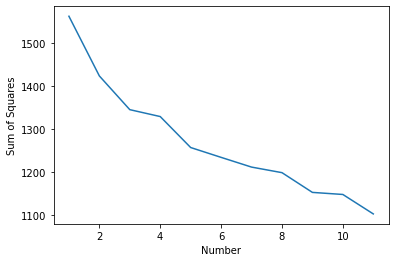

In [62]:
#find the optimal number of clusters
cluster_maximum = []

for i in range(1,12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_transformed)
    cluster_maximum.append(kmeans.inertia_)

plt.plot(np.arange(1, 12), cluster_maximum)
plt.xlabel("Number")
plt.ylabel("Sum of Squares")
plt.show()



The optimal number for kmeans clustering equals 3, because the plot shows an elbow at k equals 3.

**This was the end of the Toronto Venues Clustering Analysis. I hope you enjoyed it!**